### ARMA example using sunpots data

In [34]:
import numpy as np
from scipy import stats
import pandas
import matplotlib.pyplot as plt

import statsmodels.api as sm
%matplotlib inline

In [2]:
from statsmodels.graphics.api import qqplot

In [3]:
print sm.datasets.sunspots.NOTE

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [30]:
dta = sm.datasets.sunspots.load_pandas().data

In [31]:
dta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
print dta

                     SUNACTIVITY
1700-12-31 00:00:00          5.0
1701-12-31 00:00:00         11.0
1702-12-31 00:00:00         16.0
1703-12-31 00:00:00         23.0
1704-12-31 00:00:00         36.0
1705-12-31 00:00:00         58.0
1706-12-31 00:00:00         29.0
1707-12-31 00:00:00         20.0
1708-12-31 00:00:00         10.0
1709-12-31 00:00:00          8.0
1710-12-31 00:00:00          3.0
1711-12-31 00:00:00          0.0
1712-12-31 00:00:00          0.0
1713-12-31 00:00:00          2.0
1714-12-31 00:00:00         11.0
1715-12-31 00:00:00         27.0
1716-12-31 00:00:00         47.0
1717-12-31 00:00:00         63.0
1718-12-31 00:00:00         60.0
1719-12-31 00:00:00         39.0
1720-12-31 00:00:00         28.0
1721-12-31 00:00:00         26.0
1722-12-31 00:00:00         22.0
1723-12-31 00:00:00         11.0
1724-12-31 00:00:00         21.0
1725-12-31 00:00:00         40.0
1726-12-31 00:00:00         78.0
1727-12-31 00:00:00        122.0
1728-12-31 00:00:00        103.0
1729-12-31

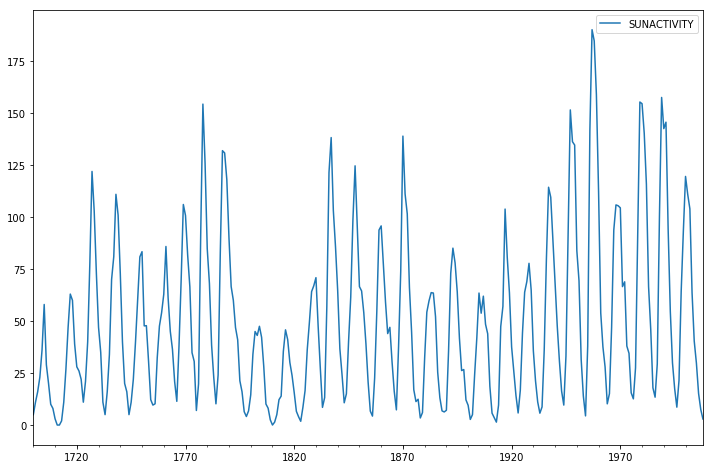

In [35]:
dta.plot(figsize=(12,8));

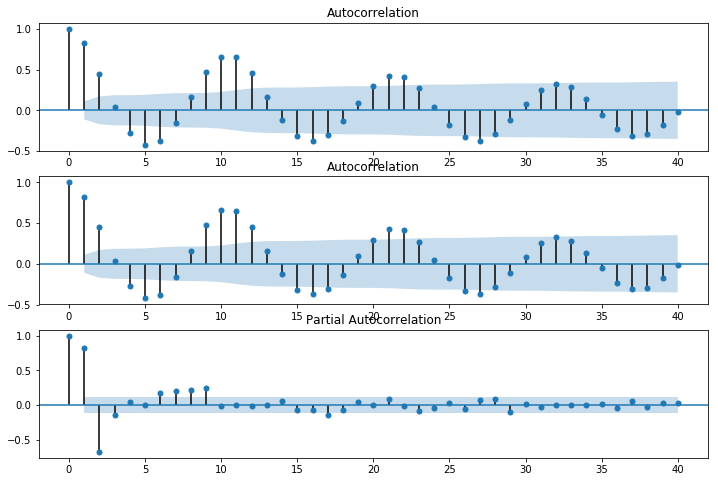

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(311)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(312)
sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax2)
ax3 = fig.add_subplot(313)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax3)

In [53]:
arma_mod20 = sm.tsa.AR(dta).fit()
print arma_mod20.params

const              8.128902
L1.SUNACTIVITY     1.157001
L2.SUNACTIVITY    -0.397963
L3.SUNACTIVITY    -0.174587
L4.SUNACTIVITY     0.150007
L5.SUNACTIVITY    -0.110178
L6.SUNACTIVITY     0.025265
L7.SUNACTIVITY     0.060902
L8.SUNACTIVITY    -0.092937
L9.SUNACTIVITY     0.272277
L10.SUNACTIVITY   -0.027084
L11.SUNACTIVITY    0.016550
L12.SUNACTIVITY    0.025356
L13.SUNACTIVITY   -0.108747
L14.SUNACTIVITY    0.107336
L15.SUNACTIVITY    0.023532
L16.SUNACTIVITY   -0.080584
dtype: float64


In [96]:
arma_mod30 = sm.tsa.ARMA(dta, (9,0)).fit()

In [46]:
print arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic

2622.63633806 2637.56970317 2628.60672591


In [11]:
print arma_mod30.params

const                49.749900
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64


In [12]:
print arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic

2619.4036287 2638.07033508 2626.8666135


* Does our model obey the theory?

In [54]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564809484851813

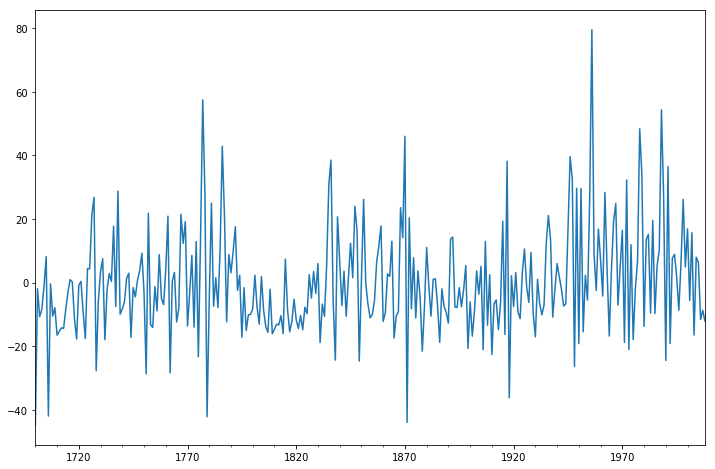

In [55]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [15]:
resid = arma_mod30.resid

In [16]:
stats.normaltest(resid)

NormaltestResult(statistic=49.84502837307943, pvalue=1.5006852489043021e-11)

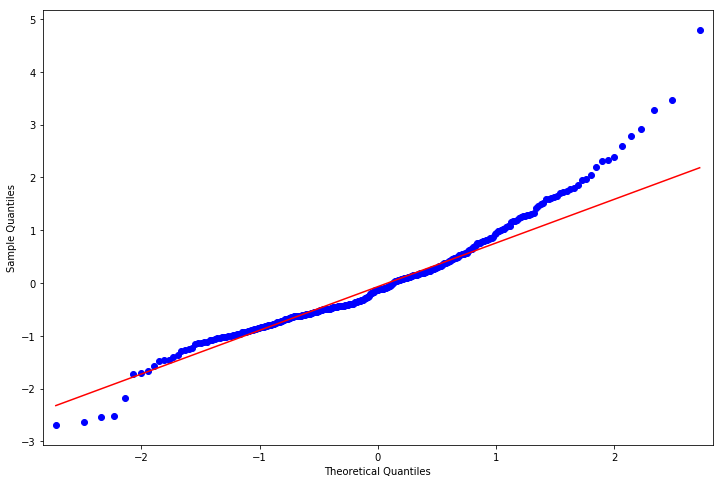

In [56]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

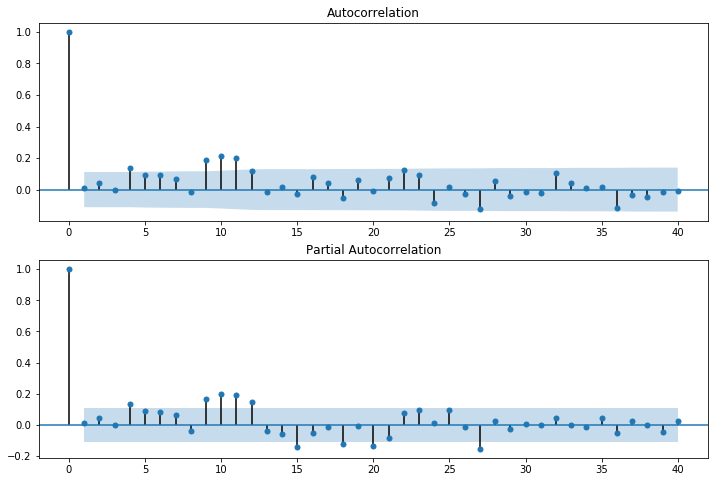

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [19]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pandas.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009179   0.026286  8.712033e-01
2.0   0.041793   0.573043  7.508710e-01
3.0  -0.001335   0.573602  9.024480e-01
4.0   0.136089   6.408918  1.706205e-01
5.0   0.092468   9.111822  1.046862e-01
6.0   0.091948  11.793234  6.674370e-02
7.0   0.068748  13.297190  6.519008e-02
8.0  -0.015020  13.369218  9.976168e-02
9.0   0.187592  24.641899  3.393923e-03
10.0  0.213718  39.321985  2.229482e-05
11.0  0.201082  52.361130  2.344956e-07
12.0  0.117182  56.804183  8.574277e-08
13.0 -0.014055  56.868320  1.893906e-07
14.0  0.015398  56.945559  3.997667e-07
15.0 -0.024967  57.149314  7.741483e-07
16.0  0.080916  59.296763  6.872181e-07
17.0  0.041138  59.853731  1.110947e-06
18.0 -0.052021  60.747422  1.548436e-06
19.0  0.062496  62.041685  1.831647e-06
20.0 -0.010301  62.076972  3.381250e-06
21.0  0.074453  63.926648  3.193592e-06
22.0  0.124955  69.154766  8.978368e-07
23.0  0.093162  72.071031  5.799790e-07


* This indicates a lack of fit.

* In-sample dynamic prediction. How good does our model do?

In [20]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print predict_sunspots

1990-12-31    167.047399
1991-12-31    140.992964
1992-12-31     94.859065
1993-12-31     46.860852
1994-12-31     11.242545
1995-12-31     -4.721322
1996-12-31     -1.166932
1997-12-31     16.185671
1998-12-31     39.021857
1999-12-31     59.449835
2000-12-31     72.170096
2001-12-31     75.376731
2002-12-31     70.436404
2003-12-31     60.731536
2004-12-31     50.201753
2005-12-31     42.075992
2006-12-31     38.114258
2007-12-31     38.454616
2008-12-31     41.963786
2009-12-31     46.869253
2010-12-31     51.423221
2011-12-31     54.399673
2012-12-31     55.321643
Freq: A-DEC, dtype: float64


/Users/gyg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


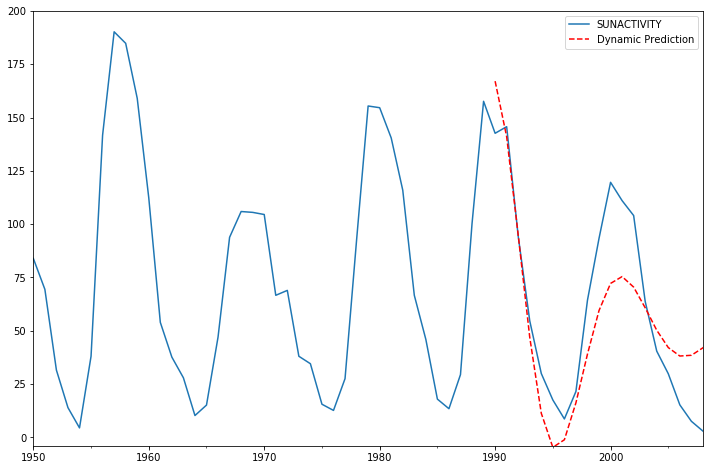

In [58]:
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

In [93]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [95]:
mean_forecast_err(dta.SUNACTIVITY, predict_sunspots)
a=sm.tsa.AR(dta)
a.select_order(maxlag=15,ic='bic')

9

### Exercise: Can you obtain a better fit for the Sunspots model? (Hint: sm.tsa.AR has a method select_order)

### Simulated ARMA(4,1): Model Identification is Difficult

In [64]:
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

In [65]:
np.random.seed(1234)
# include zero-th lag
arparams = np.array([1, .75, -.65, -.55, .9])
maparams = np.array([1, .65])

* Let's make sure this models is estimable.

In [66]:
arma_t = ArmaProcess(arparams, maparams)

In [68]:
arma_t.isinvertible

True

In [69]:
arma_t.isstationary

False

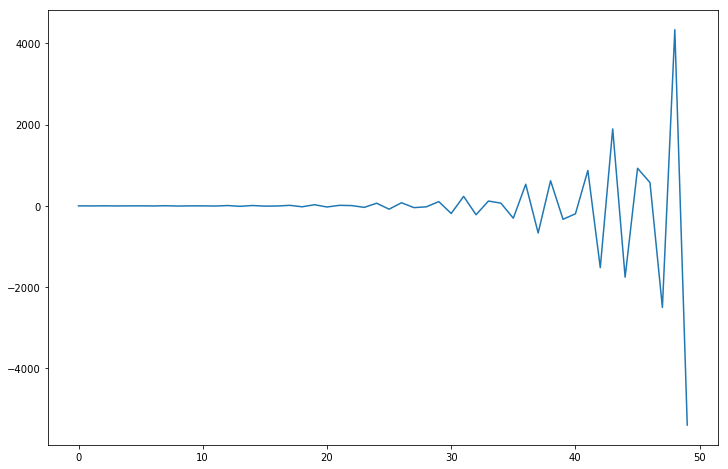

In [71]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(50));

In [72]:
arparams = np.array([1, .35, -.15, .55, .1])
maparams = np.array([1, .65])
arma_t = ArmaProcess(arparams, maparams)
arma_t.isstationary

True

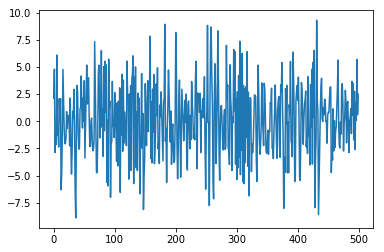

In [76]:
arma_rvs = arma_t.generate_sample(500, burnin=250, scale=2.5)
plt.plot(arma_rvs)

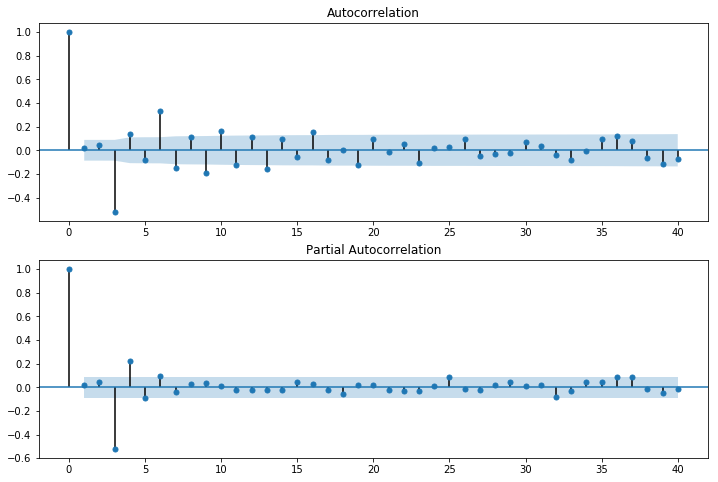

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_rvs, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_rvs, lags=40, ax=ax2)

In [85]:
arma11 = sm.tsa.ARMA(arma_rvs, (4,4)).fit()
resid = arma11.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pandas.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

            AC          Q  Prob(>Q)
lag                                
1.0  -0.000803   0.000324  0.985635
2.0  -0.006770   0.023425  0.988356
3.0   0.001113   0.024051  0.999015
4.0   0.008302   0.058932  0.999574
5.0  -0.023256   0.333185  0.996972
6.0  -0.018596   0.508890  0.997729
7.0   0.051582   1.863547  0.967005
8.0  -0.064487   3.985084  0.858467
9.0  -0.007797   4.016159  0.910346
10.0  0.092626   8.410967  0.588761
11.0 -0.027816   8.808115  0.639599
12.0 -0.014901   8.922314  0.709551
13.0  0.021818   9.167648  0.760167
14.0  0.004540   9.178292  0.819462
15.0 -0.055489  10.771769  0.768599
16.0 -0.070037  13.315537  0.649562
17.0 -0.011326  13.382203  0.710248
18.0 -0.062432  15.411916  0.633516
19.0 -0.016357  15.551528  0.686959
20.0  0.001221  15.552307  0.743981
21.0 -0.057942  17.311525  0.692058
22.0 -0.026091  17.668994  0.725423
23.0 -0.001006  17.669527  0.775160
24.0  0.076186  20.730191  0.654586
25.0  0.059437  22.596979  0.601084
26.0  0.086119  26.524291  0

In [ ]:
arma41 = sm.tsa.ARMA(arma_rvs, (4,1)).fit()
resid = arma41.resid
r,q,p = sm.tsa.acf(resid, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pandas.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print table.set_index('lag')

### Exercise: How good of in-sample prediction can you do for another series, say, CPI

In [86]:
macrodta = sm.datasets.macrodata.load_pandas().data
macrodta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
cpi = macrodta["cpi"]

#### Hint: 

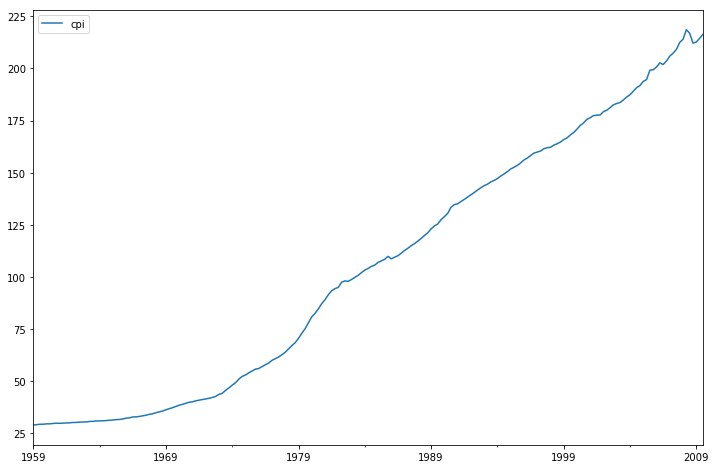

In [87]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = cpi.plot(ax=ax);
ax.legend();

In [89]:
print sm.tsa.adfuller(cpi)

(0.73079496878438077, 0.99043281883374223, 12, 190, {'5%': -2.8768752281673717, '1%': -3.4652439354133255, '10%': -2.5749446537396121}, 448.07065606951585)
